In [1]:
import pandas as pd
import seaborn as sns

import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cbook as cbook

from DBScan import DBScan

# Leitura do Dataset

In [2]:
conjunto = pd.read_csv('dataset_processado.csv')
conjunto = conjunto.drop_duplicates(subset=['cases' , 'deaths']) #Remoção de dados duplicados
conjunto.sample(n=500)

,county,cases,deaths
8341,Sacramento,87,4
39162,St. John the Baptist,415,34
41051,Palm Beach,1222,69
5270,El Paso,27,3
11784,Suffolk,2260,20
...,...,...,...
15787,Dane,158,1
24539,Franklin,39,5
39122,Bossier,146,4
14775,Hampden,90,2


In [3]:
N = len(conjunto)
x = conjunto.cases.values
y = conjunto.deaths.values

print(N)
print(x.shape)
print(y.shape)

3563
(3563,)
(3563,)


In [4]:
coordenadas = [ [ x[i] , y[i] ] for i in range(len(x)) ]
conjunto['points'] = coordenadas

In [5]:
len(conjunto['points'])

3563

# Teste com DBSCAN

In [6]:
min_points=20
epsilon=50

In [7]:
db_scan = DBScan(coordenadas)
labels = db_scan.make_clusters( min_pts=min_points, eps=epsilon)

In [8]:
coords = coordenadas

# Plot das informações

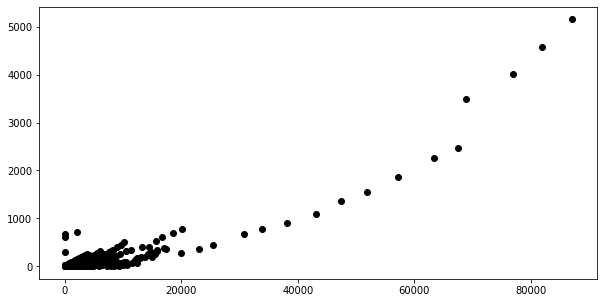

In [9]:
fig, ax = plt.subplots(figsize=( 10, 5 ))

for coordenada in conjunto['points']:
    x_c, y_c = coordenada
    plt.plot(x_c, y_c, 'o', color='black')

plt.show()

# Organização dos Dados

In [10]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=epsilon, min_samples=min_points).fit( list(conjunto['points']) )
c_labels = clustering.labels_

In [11]:
outliner_mine = []
cluster_mine  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (labels[i] == -1):
        outliner_mine.append([x_c, y_c])
    else:
        cluster_mine.append([x_c, y_c])
        

In [12]:
outliner_sklearn = []
cluster_sklearn  = []
for i in range( len(coords) ):
    x_c, y_c = coords[i]
    if (c_labels[i] == -1):
        outliner_sklearn.append([x_c, y_c])
    else:
        cluster_sklearn.append([x_c, y_c])

# Comparação com Sklearn

## Meu script

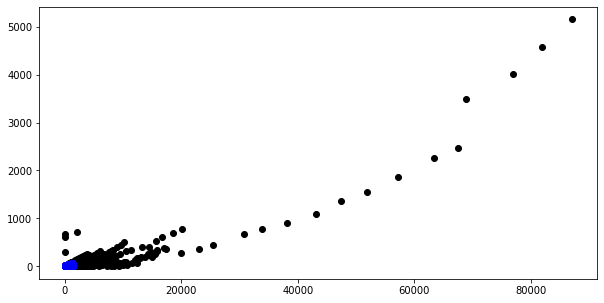

In [13]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='black') for c in outliner_mine ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in cluster_mine ]

plt.show()

## Sklean

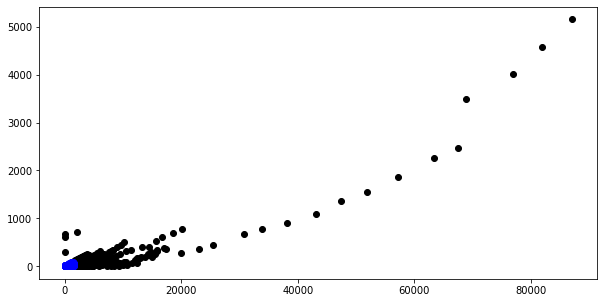

In [14]:
fig, ax = plt.subplots(figsize=( 10, 5 ))
[ plt.plot(c[0], c[1], 'o', color='black') for c in outliner_sklearn ]
[ plt.plot(c[0], c[1], 'o', color='blue') for c in cluster_sklearn ]

plt.show()

In [15]:
print("sklearn", "mine")
print(len(outliner_sklearn), len(outliner_mine))
print(len(cluster_sklearn), len(cluster_mine))

sklearn mine
367 424
3196 3139
